<a href="https://www.kaggle.com/code/karan842/cnn-vs-transfer-learning?scriptVersionId=90784814" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Is it CAT🐈 or DOG🐕? 🤔💭

## Image detection with the help of Neural Networks🧠🔢

![](https://media.istockphoto.com/photos/happy-mixed-breed-dog-posing-with-a-kitten-on-his-head-picture-id1210341751?k=20&m=1210341751&s=612x612&w=0&h=v0Dw0214h_1zUG1bZTXx8IG0QwfOwi3Iqd52QNii6ZI=)

# What is Convolutional Neural Networks??

   **In deep learning, a convolutional neural network is a class of artificial neural network, most commonly applied to analyze visual imagery.**
 
   
![](https://miro.medium.com/max/880/1*-9yF-a8gUktDKgRpuNuxNA.png)

# What are the different layers in the convolutional neural network?

Some of the basic layers in the CNN👇:

1. Convolutional Layer: This layer is the first layer that is used to extract the various features from the input images. In this layer, the mathematical operation of convolution is performed between the input image and a filter of a particular size MxM. By sliding the filter over the input image, the dot product is taken between the filter and the parts of the input image with respect to the size of the filter (MxM).The output is termed as the Feature map which gives us information about the image such as the corners and edges. Later, this feature map is fed to other layers to learn several other features of the input image.

2. Pooling Layer: In most cases, a Convolutional Layer is followed by a Pooling Layer. The primary aim of this layer is to decrease the size of the convolved feature map to reduce the computational costs. This is performed by decreasing the connections between layers and independently operates on each feature map. Depending upon method used, there are several types of Pooling operations. In Max Pooling, the largest element is taken from feature map. Average Pooling calculates the average of the elements in a predefined sized Image section. The total sum of the elements in the predefined section is computed in Sum Pooling. The Pooling Layer usually serves as a bridge between the Convolutional Layer and the FC Layer.

3. Dense Layer: In any neural network, a dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer. This layer is the most commonly used layer in artificial neural network networks. The dense layer’s neuron in a model receives output from every neuron of its preceding layer, where neurons of the dense layer perform matrix-vector multiplication. Matrix vector multiplication is a procedure where the row vector of the output from the preceding layers is equal to the column vector of the dense layer. The general rule of matrix-vector multiplication is that the row vector must have as many columns like the column vector.

4. Input layer: The input layer is the input of the whole CNN. In the neural network of image processing, it generally represents the pixel matrix of the image.

5. Output layer: In a CNN as mentioned previously is a fully connected layer, where the input from the other layers is flattened and sent so as the transform the output into the number of classes as desired by the network.

## Workflow of CNN
![CNN GIF](https://miro.medium.com/max/1400/1*n3TBO5i8hrYAujlhiHoE_w.gif)

# What is transfer learning 🪄

The reuse of a previously learned model on a new problem is known as transfer learning. It’s particularly popular in deep learning right now since it can train deep neural networks with a small amount of data. This is particularly valuable in the field of data science, as most real-world situations do not require millions of labelled data points to train complicated models. 


## For Deep Learning
![](https://editor.analyticsvidhya.com/uploads/751191_rsgubd7aTgUdY65KPYATBA.png)

## How it works

In computer vision, neural networks typically aim to detect edges in the first layer, forms in the middle layer, and task-specific features in the latter layers. The early and central layers are employed in transfer learning, and the latter layers are only retrained. It makes use of the labelled data from the task it was trained on.

## Why Should You Use Transfer Learning?

Transfer learning offers a number of advantages, the most important of which are reduced training time, improved neural network performance (in most circumstances), and the absence of a large amount of data.

To train a neural model from scratch, a lot of data is typically needed, but access to that data isn’t always possible – this is when transfer learning comes in handy.

![](https://editor.analyticsvidhya.com/uploads/35504classifiers-transfer-learning.jpeg)

## When to Use Transfer Learning

When we don’t have enough annotated data to train our model with. When there is a pre-trained model that has been trained on similar data and tasks. If you used TensorFlow to train the original model, you might simply restore it and retrain some layers for your job. Transfer learning, on the other hand, only works if the features learnt in the first task are general, meaning they can be applied to another activity. Furthermore, the model’s input must be the same size as it was when it was first trained.

- TRAINING A MODEL TO REUSE IT

Consider the situation in which you wish to tackle Task A but lack the necessary data to train a deep neural network. Finding a related task B with a lot of data is one method to get around this.

Utilize the deep neural network to train on task B and then use the model to solve task A. The problem you’re seeking to solve will decide whether you need to employ the entire model or just a few layers.

If the input in both jobs is the same, you might reapply the model and make predictions for your new input. Changing and retraining distinct task-specific layers and the output layer, on the other hand, is an approach to investigate.

- USING A PRE-TRAINED MODEL

The second option is to employ a model that has already been trained. There are a number of these models out there, so do some research beforehand. The number of layers to reuse and retrain is determined by the task.

## Models That Have Been Pre-Trained

There are a number of popular pre-trained machine learning models available. The Inception-v3 model, which was developed for the ImageNet “Large Visual Recognition Challenge,” is one of them.” Participants in this challenge had to categorize pictures into 1,000 subcategories such as “zebra,” “Dalmatian,” and “dishwasher.”
![](https://editor.analyticsvidhya.com/uploads/499849315476_1592890541_transfer.jpg)

# Lets train the both models (CNN and Transfer Learning)🥊

### Implementing the code ( Image detection (🐈vs🐕) )

## Importing essential libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import itertools
%matplotlib inline

### File path of the train and test data

In [2]:
train_path = '/kaggle/input/cat-and-dog/training_set/training_set'
# valid_path = 'data/dogs-vs-cats/valid'
test_path = '../input/cat-and-dog/test_set/test_set'

## Importing deep learning libraries 

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# Data Augmentation

Image Augmentation for Computer Vision Applications
Amongst the popular deep learning applications, computer vision tasks such as image classification, object detection, and segmentation have been highly successful. Data augmentation can be effectively used to train the DL models in such applications. Some of the simple transformations applied to the image are; geometric transformations such as Flipping, Rotation, Translation, Cropping, Scaling, and color space transformations such as color casting, Varying brightness, and noise injection.

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=16)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=16, shuffle=False)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


### Printing the images, size(dimensions) and labels

In [5]:
imgs, labels = next(train_batches)

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        print(img.shape)
#         print(labels)
    plt.tight_layout()
    plt.show()

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


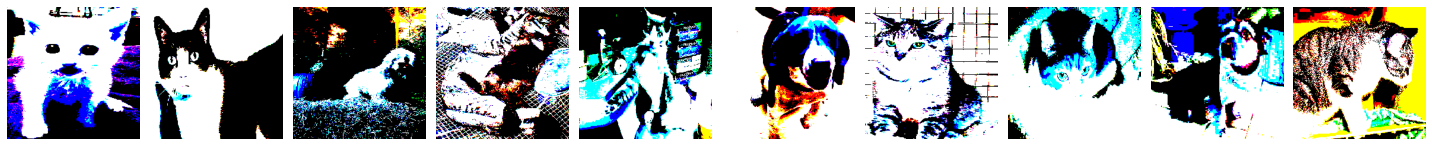

In [7]:
plotImages(imgs)

In [8]:
print(labels)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


### Point this - cats are labeled with a one-hot encoding of [1,0], and dogs are labeled as [0,1].

# Building a model

Building a neural network with the help of tensorflow and keras. Training CNN model and model with transfer learning, then by comparing them we can see the difference.

## Convolutional Neural Network

In [9]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

2022-03-21 06:03:26.080563: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-21 06:03:26.216848: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-21 06:03:26.217813: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-21 06:03:26.219939: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 220, 220, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 32)      18464     
_________________________________________________________________
batch_normalization_2 (Batch (None, 108, 108, 32)      1

## Avoid overfitting

In [11]:
# Using callbacks for avoiding overfitting
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(patience=5, 
                               min_delta=0.001,
                               restore_best_weights=True)

# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
#                                            patience = 2,
#                                            verbose=1,
#                                            factor=0.5,
#                                            min_lr = 0.00001)

## Fitting the CNN Model

You can try with more epochs...

In [12]:
# fitting the model
r = model.fit(x=train_batches,epochs=10,callbacks=[early_stopping])

2022-03-21 06:03:29.364972: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-03-21 06:03:31.153135: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


501/501 [==============================] - 93s 171ms/step - loss: 9.0888 - accuracy: 0.5629
Epoch 2/10
501/501 [==============================] - 42s 83ms/step - loss: 5.7518 - accuracy: 0.6274
Epoch 3/10
501/501 [==============================] - 42s 84ms/step - loss: 3.7037 - accuracy: 0.6862
Epoch 4/10
501/501 [==============================] - 43s 85ms/step - loss: 2.0912 - accuracy: 0.7384
Epoch 5/10
501/501 [==============================] - 42s 84ms/step - loss: 1.1783 - accuracy: 0.7861
Epoch 6/10
501/501 [==============================] - 42s 83ms/step - loss: 0.6745 - accuracy: 0.8365
Epoch 7/10
501/501 [==============================] - 41s 81ms/step - loss: 0.4358 - accuracy: 0.8701
Epoch 8/10
501/501 [==============================] - 42s 84ms/step - loss: 0.2942 - accuracy: 0.8956
Epoch 9/10
501/501 [==============================] - 42s 83ms/step - loss: 0.2141 - accuracy: 0.9183
Epoch 10/10
501/501 [==============================] - 42s 84ms/step - loss: 0.1838 - accura

## CNN model Performance with the help of graphs.

Text(0.5, 1.0, 'Accuracy Evolution')

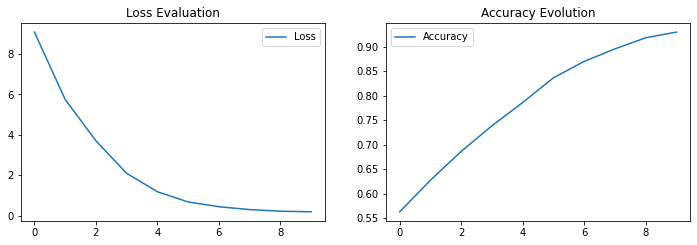

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(r.history['loss'], label='Loss')
# plt.plot(r.history['val_loss'],label='Val_Loss')
plt.legend()
plt.title('Loss Evaluation')

plt.subplot(2,2,2)
plt.plot(r.history['accuracy'], label='Accuracy')
# plt.plot(r.history['val_accuracy'],label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

#### CNN Model performed very well in this case.

## CNN model Predictions

# Test images

In [14]:
# Extracting a batch of images and their corresponding labels from the test set.

test_imgs, test_labels = next(test_batches)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


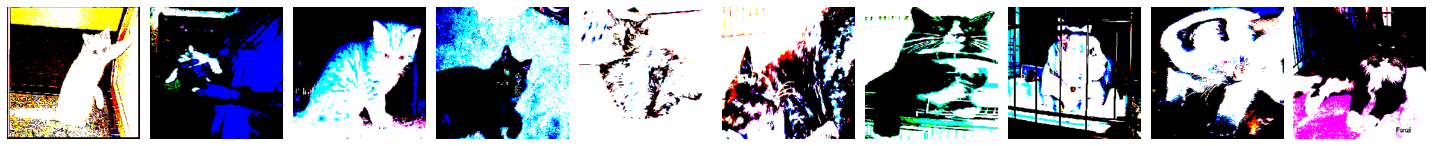

In [15]:
plotImages(test_imgs)

In [16]:
print(test_labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# Predictions on the test data

In [17]:
predictions = model.predict(x=test_batches, verbose=0)

In [18]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

## Evaluating the CNN model with confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

## Above function will return the confusion matrix

In [20]:
import itertools
def plot_cm(cm, classes,normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Class indices

In [21]:
test_batches.class_indices

{'cats': 0, 'dogs': 1}

## We will see the confusion matrix of both the models at the end of the this notebook.

# Using Transfer Learning

##### We are using VGG19 model for this training.

## What is VGG19:
**VGG-19 is a convolutional neural network that is 19 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224.**
![](https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16.jpg)

## Loading VGG19 the model

In [22]:
vgg19 = tf.keras.applications.vgg19.VGG19()

574726144/574710816 [==============================] - 5s 0us/step


In [23]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [24]:
# type of a model
type(vgg19)

keras.engine.functional.Functional

We’re going to go through a process to convert the Functional model to a Sequential model, so that it will be easier for us to work with given our current knowledge.

We first create a new model of type Sequential. We then iterate over each of the layers in vgg19, except for the last layer, and add each layer to the new Sequential model.

In [25]:
vgg_model = Sequential()
for layer in vgg19.layers[:-1]:
    vgg_model.add(layer)

we’ll iterate over each of the layers in our new Sequential model and set them to be non-trainable. This freezes the weights and other trainable parameters in each layer so that they will not be trained or updated when we later pass in our images of cats and dogs.

In [26]:
for layer in vgg_model.layers:
    layer.trainable = False

The reason we don’t want to retrain these layers is because, as mentioned earlier, cats and dogs were already included in the original ImageNet library. So, VGG16 already does a nice job at classifying these categories. We only want to modify the model such that the output layer understands only how to classify cats and dogs and nothing else. Therefore, we don’t want any re-training to occur on the earlier layers.

Next, we add our new output layer, consisting of only 2 nodes that correspond to cat and dog. This output layer will be the only trainable layer in the model.

In [27]:
vgg_model.add(Dense(units=2, activation="softmax"))

In [28]:
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# Training the VGG19 model

In [29]:
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
early_stopping = EarlyStopping(patience=2, 
                               min_delta=0.001,
                               restore_best_weights=True)

# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
#                                            patience = 1,
#                                            verbose=1,
#                                            factor=0.5,
#                                            min_lr = 0.00001)


In [31]:
vgg_model.fit(x = train_batches,
          steps_per_epoch = len(train_batches),
          epochs=5,
          callbacks=[early_stopping])

Epoch 1/5
501/501 [==============================] - 43s 81ms/step - loss: 0.0864 - accuracy: 0.9716
Epoch 2/5
501/501 [==============================] - 40s 79ms/step - loss: 0.0434 - accuracy: 0.9879
Epoch 3/5
501/501 [==============================] - 40s 80ms/step - loss: 0.0188 - accuracy: 0.9923
Epoch 4/5
501/501 [==============================] - 40s 79ms/step - loss: 0.0151 - accuracy: 0.9949
Epoch 5/5
501/501 [==============================] - 39s 79ms/step - loss: 0.0136 - accuracy: 0.9958


Text(0.5, 1.0, 'Accuracy Evolution on VGG19')

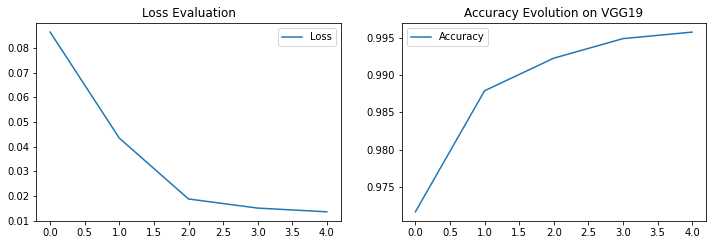

In [32]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(vgg_model.history.history['loss'], label='Loss')
# plt.plot(r.history['val_loss'],label='Val_Loss')
plt.legend()
plt.title('Loss Evaluation')

plt.subplot(2,2,2)
plt.plot(vgg_model.history.history['accuracy'], label='Accuracy')
# plt.plot(r.history['val_accuracy'],label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution on VGG19')

### In both CNN and VGG19 our models trained very well. Both are shwoing same type of trend in their loss and accuracy graphs.

#### So who won??

First of all lets evaluate the VGG19 model and that will show us the result will show us the winner. 

# Prediction on VGG19 model

In [33]:
predVGG19 = vgg_model.predict(x=test_batches)
predVGG19

array([[1.0000000e+00, 1.0763126e-09],
       [1.0000000e+00, 7.4461797e-09],
       [1.0000000e+00, 1.3612780e-19],
       ...,
       [2.1468945e-06, 9.9999785e-01],
       [4.8889540e-16, 1.0000000e+00],
       [5.1258134e-14, 1.0000000e+00]], dtype=float32)

In [34]:
# rounding off the prediction of VGG19
np.round(predVGG19)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

#### This numbers and arrays are to confusing. So best practice is for evaluation of this model is Confusion Matrix.

We already made a function that will give us confusion matrix with labels

### Confusion Matrix on VGG19 model vs CNN model

In [35]:
vgg19_cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predVGG19, axis=-1))

## Confusion Matrix - CNN Model

Confusion matrix, without normalization
[[667 344]
 [321 691]]


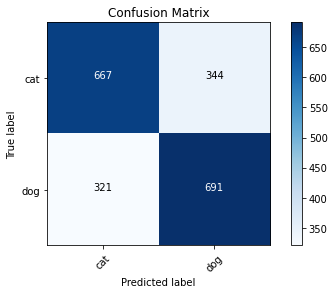

In [36]:
cm_plot_labels = ['cat', 'dog']
plot_cm(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Confusion Matrix - VGG19 Model

Confusion matrix, without normalization
[[1000   11]
 [  19  993]]


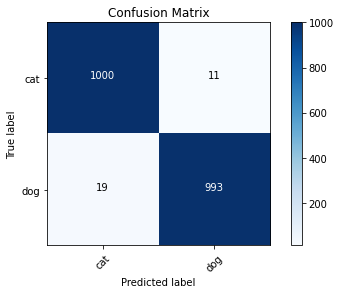

In [37]:
cm_plot_labels = ['cat', 'dog']
plot_cm(cm=vgg19_cm, classes=cm_plot_labels, title='Confusion Matrix')

# Winner🥇:

Both the models performed very well but from confusion matrix we saw thet **VGG19**(transfer learning) is few steps ahead that CNN model.


I made this notebook while learning Transfer Learning.


### Give an upvote⚡